# Example 4c (EX4c)

__Summary:__  Because we now have a 3-d basic state the longitude of the equatorial heating perturbation makes a difference. Here we try putting it at a different longitude. How different is the response ?

### How to run the model and produce netcdf outputs:

* Go to the terminal window.
* Go to the jobs directory: `cd  ~/work/DREAM/dream_model/jobs`
* Run the model script: `./runmodel_v8.4_EX4c.sh` (note that we're now using a different heating anomaly file (l. 138: `ln  -s $DATADIRSP/fan/CPac_EQ220E_40x15_Deep_2dpd_fan.b  fort.15`) centered on 220° longitude E.

* Then in the terminal go to the diagnostics directory: `cd ~/work/DREAM/dream_model/diagnostics/`,
* Run the diagnostics script: `./run_output.sh EX4c`.
* The model outputs and diagnostics will be saved in `DREAM/dream_results/EX4c/netcdfs/`

### Open and plot results with Python

#### Import Python Packages


In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr
    
# plot
import cartopy.crs as ccrs
import cartopy.feature as ccf
import cartopy.util as ccu
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.animation as animation

import ipywidgets as widgets
from IPython.display import display, HTML, Image, clear_output



# My custom module with plot tools
import utils_SLX_plots_dream as slx


# Only if using jupyter notebook. Otherwise, comment out.
%matplotlib inline 

---
# Read DREAM model outputs:

* Set parameters:

In [2]:
EXPID="EX4c"

# local directory of input files (in the DOcker container)
diri = "/home/jovyan/work/DREAM/dream_results/"+EXPID+"/netcdfs/"

# input file
fili = "dreamT31L15_gph_100.nc"

# where to save output plots and movies
diro = "/home/jovyan/work/DREAM/dream_results/"+EXPID+"/plots/"

* Read data (with the python package xarray):

In [3]:

zanom = xr.open_dataset(diri+fili,decode_times=True)['gph'].squeeze()

# number of time frames in this experiment
NTF=zanom.time.size
NTF

81

---
# Display basic infos

In [4]:
# print info on the array
print(zanom)

<xarray.DataArray 'gph' (time: 81, lat: 48, lon: 96)> Size: 3MB
[373248 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 384B -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon      (lon) float64 768B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
    lev      float64 8B 0.1
  * time     (time) datetime64[ns] 648B 1900-01-01 ... 1900-01-21
Attributes:
    units:          m
    long_name:      geopotential height on sigma levels
    standard_name:  geopotential height


* Print max, min, mean values of all array

In [6]:
print(zanom.max().values)
print(zanom.mean().values)
print(zanom.min().values)

88.87186499501573
10.379921872248785
-54.92587949259503


#### Maps for all timeframe

In [7]:
#------------ geography
# Global plot? True/False
glo= True

# center longitude on:
loncentr=180.

# set coastL to True if you want coaslines
coastL=False

#------------ color shading

# type of plot (can be 'contourf', 'pcolormesh', defaut is contourf)

typlo='contourf'

# min max values on the colorscale
vmin=-80
vmax=80

# colormap
cm_base=slx.make_NCLcolormap()

# number of color segments of the colormap
Nincr=20

# color of the values smaller than vmin
su='#EFF5FB'
# color of the values larger than vmax
so='#F8E0E0'

# colorbar label 
labelplt= "100 hPa Geopot. height ("+zanom.units+")"

# number of labels on the colorbar
Nbar=3

#------------ plot output
# plot format
pltty = ".png"


# plot resolution (dpi)
dpifig=200

# base name for output plot file
plti="Z100_"+EXPID


#### Plot and save single png maps for each timeframe

Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0000.png


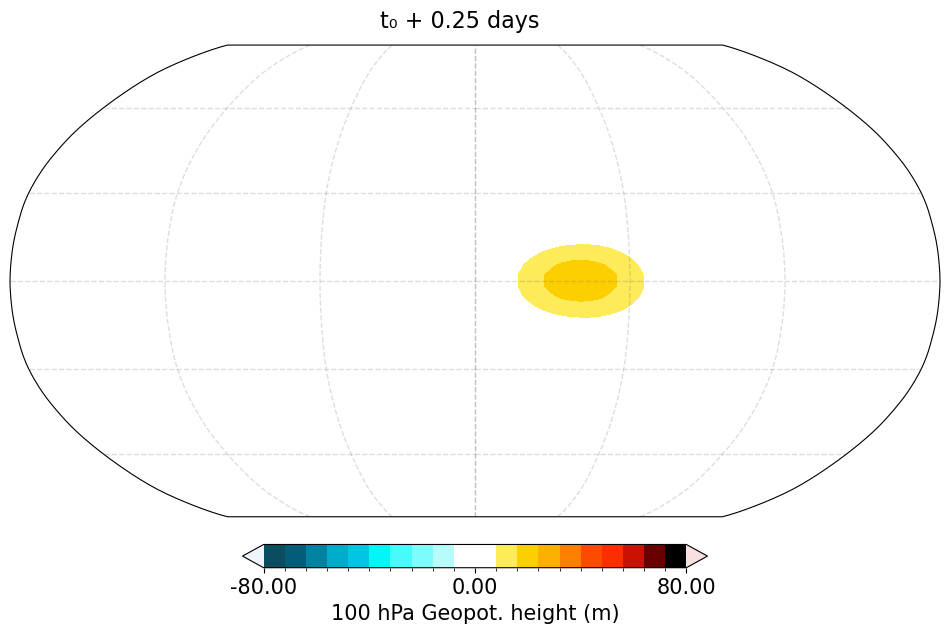

Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0001.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0002.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0003.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0004.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0005.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0006.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0007.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0008.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0009.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0010.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0011.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX4c/plots//Z100_EX4c.0012.png
Saved to ... /ho

In [8]:
# loop on all time steps in the data array:
for it in range(0,NTF,1):
     
        # this is to plor only once a day (when hour==00)
        #if (time.hour[it]==0):
                
            # output plot file name including the time index
            plto = plti+"."+str(it).zfill(4)
    

            # data to plot (must be a 2-d np.array)
            # here we select one timestep at a time for plotting purposes
            data2plot  = zanom.isel(time=it).values

            # make the data to plot cyclic so that the values at longitude 0 are repeated at 360. (for plot purposes)
            cyclic_data, cyclic_lons = ccu.add_cyclic_point(data2plot, coord=zanom.lon.values)

            #----------------------------------------------------
            #------ PLOT ----------------------------------------
            #----------------------------------------------------

            # create fig
            fig1 = plt.figure(figsize=([12,9]),facecolor='white')

            # plot data (base plot from plotmap functionn defined above)
            
            cs = slx.plotmap(fig1,cyclic_data,cyclic_lons,zanom.lat.values,plto,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=glo,coastL=coastL,su=su,so=so,loncentr=loncentr,typlo=typlo,Nbar=Nbar,labelplt=labelplt)

            # add title on plot (date)
            #plt.title(slx.printdatestring(airanom.time.to_index(),it))
            # Compute days since t0
            t0 = zanom.time[0].values
            current_time = zanom.time[it].values
            delta_days = (np.datetime64(current_time) - np.datetime64(t0)) / np.timedelta64(1, 'D')
            title_text = fig1.text(0.5, 0.8, f"t₀ + {delta_days:.2f} days", ha='center', fontsize=16)

            if it==1:
                # display plot only once in the loop
                plt.show()
    
            # Save fig in png, resolution dpi
            fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none', dpi=dpifig,bbox_inches='tight', pad_inches=0)
            print("Saved to ... "+diro+"/"+plto+'.png')
            # close fig
            plt.close(fig1)    

#print("INITAL STATE:")
#display(Image(os.path.join(diro+"Z100_EX1b.101.png")))
#print('NOTE: All intermediate frames have been saved to '+diro)

#### Display any of the time frames

In [9]:
# view figures
slider_expe = widgets.IntSlider(
    value=0,
    min=0,
    max=NTF-1,
    step=1,
    description='Time slider:',
    continuous_update=False
)
output_expe = widgets.Output()

def update_plot(it):
    with output_expe:
        clear_output(wait=True)
        tim = str(it).zfill(4)
        display(Image(filename=os.path.join(diro+"Z100_"+EXPID+"."+tim+".png")))

widgets.interact(update_plot, it=slider_expe)
display(output_expe)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time slider:', max=80), Output(…

Output()